<div style="
    background-color: #e76f6f;
    border-radius:  40px 20px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Import Libraries and Load Data
    </span>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set_palette('Set2')

In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn/Bank_churn.csv')

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Rating,Exited,"Geography:str,Gender:str"
0,0.0,15674932.0,"O,k{wudilic_-huk>wu_",668.0,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,-3,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
1,1.0,15749177.0,"O{kwudi""li#%%'oli=-sa",627.0,33.0,1.0,0.00,2.0,1.0,1.0,49503.5,0,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
2,2.0,15694510.0,Hsueh,678.0,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,1,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
3,3.0,15741417.0,"Kao,]?>?%]@",581.0,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,-4,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
4,4.0,15766172.0,Ch-i]emen'-am,716.0,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,-1,0,"{'Geography': 'Madrid-Spain','Gender': 'Male'}"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        157848 non-null  float64
 1   CustomerId                157508 non-null  float64
 2   Surname                   161117 non-null  object 
 3   CreditScore               164664 non-null  float64
 4   Age                       159435 non-null  object 
 5   Tenure                    160327 non-null  float64
 6   Balance                   160993 non-null  float64
 7   NumOfProducts             159513 non-null  float64
 8   HasCrCard                 162191 non-null  float64
 9   IsActiveMember            161509 non-null  float64
 10  EstimatedSalary           160657 non-null  object 
 11  Rating                    165034 non-null  int64  
 12  Exited                    165034 non-null  int64  
 13  Geography:str,Gender:str  165034 non-null  o

In [5]:
df.describe()

,id,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Rating,Exited
count,157848.000000,1.575080e+05,164664.000000,160327.000000,160993.000000,159513.000000,162191.000000,161509.000000,165034.000000,165034.000000
mean,82523.447190,1.569204e+07,656.464710,5.022304,55497.937398,1.554745,0.753944,0.497675,-0.504108,0.211599
std,47641.133362,7.137511e+04,80.103353,2.806686,62808.409912,0.547085,0.430713,0.499996,2.871074,0.408443
min,0.000000,1.556570e+07,350.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-5.000000,0.000000
25%,41288.750000,1.563321e+07,597.000000,3.000000,0.000000,1.000000,1.000000,0.000000,-3.000000,0.000000
50%,82535.500000,1.569017e+07,659.000000,5.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,123803.250000,1.575684e+07,710.000000,7.000000,119960.290000,2.000000,1.000000,1.000000,2.000000,0.000000
max,165033.000000,1.581569e+07,850.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.describe(include='object')

,Surname,Age,EstimatedSalary,"Geography:str,Gender:str"
count,161117,159435,160657,165034
unique,154831,500,54398,12
top,T'ien,38.0,88890.05,"{'Geography': 'Paris-France','Gender': 'Male'}"
freq,111,8897,174,51226


In [7]:
df.isna().sum()

id                          7186
CustomerId                  7526
Surname                     3917
CreditScore                  370
Age                         5599
Tenure                      4707
Balance                     4041
NumOfProducts               5521
HasCrCard                   2843
IsActiveMember              3525
EstimatedSalary             4377
Rating                         0
Exited                         0
Geography:str,Gender:str       0
dtype: int64

In [8]:
df.duplicated().sum()

0

<div style="
    background-color: #e76f6f;
    border-radius:  40px 20px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
        Data Cleaning
    </span>
</div>


In [9]:
df.drop(['id','Surname','CustomerId'], axis=1,inplace=True)

In [10]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates(inplace=True)

## **Credit Score Column**

<Axes: xlabel='CreditScore', ylabel='Count'>

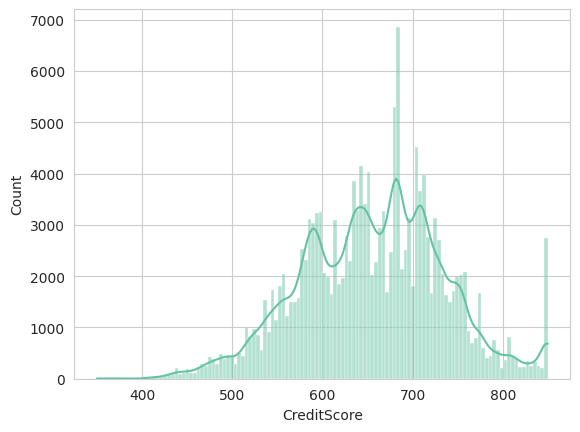

In [12]:
sns.histplot(df['CreditScore'], kde=True)

## **Age Column**

In [13]:
df['Age'].unique()

array(['33.0', '40.0', '34.0', '36.0', '30.0', '37.0', '43.0', '27.0',
       nan, '71.0', '47.0', '25.0', '55.0', '61.0', '35.0', '41.0',
       '44.0', '26.0', '39.0', '31.0', '58.0', '49.0', '32.0', '50.0',
       '28.0', '45.0', '52.0', '29.0', '47.0 year old', '38.0', '54.0',
       '56.0', '46.0', '42.0', '20.0', '21.0', '23.0', '48.0', '59.0',
       '51.0', '24.0', '53.0', '62.0', '57.0', '64.0 Jahre alt', '22.0',
       '66.0', '37.0 lebendig', '-39000.0', '67.0', '64.0', '19.0',
       '73.0', '60.0', '63.0', '41.0 year old', '-480.0', '2100.0',
       '65.0', '4200.0', '75.0', '68.0', '-350.0', '69.0', '76.0',
       '-300.0', '3300.0 year old', '19.0 lebendig', '26.0 ans et',
       '18.0', '70.0', '-390.0', 'nan lebendig', '34.0 years old',
       '33.0 year old', '510.0', '81.0', '31.0 Jahre alt', '3000.0',
       'nan years old', '31.0 years old', '47.0 ans et', '74.0',
       '32000.0', '-3800.0', '40.0 year-old', '-3700.0', '29000.0',
       '72.0', '-460.0', '280.0', 

In [14]:
df['Age'] = df['Age'].replace({'twinty five':'25', 'twinty eight':'28', 'twinty nine':'29', 'thirty':'30', 'thirty five':'35', 'fifty':'50', 'sixty seven':'67', 'seventy one':'71'})

In [15]:
df['Age'] = df['Age'].str.extract('(\d+)')
df['Age'].unique()

array(['33', '40', '34', '36', '30', '37', '43', '27', nan, '71', '47',
       '25', '55', '61', '35', '41', '44', '26', '39', '31', '58', '49',
       '32', '50', '28', '45', '52', '29', '38', '54', '56', '46', '42',
       '20', '21', '23', '48', '59', '51', '24', '53', '62', '57', '64',
       '22', '66', '39000', '67', '19', '73', '60', '63', '480', '2100',
       '65', '4200', '75', '68', '350', '69', '76', '300', '3300', '18',
       '70', '390', '510', '81', '3000', '74', '32000', '3800', '3700',
       '29000', '72', '460', '280', '34000', '540', '41000', '44000',
       '3500', '5600', '3600', '77', '570', '2800', '3900', '4300', '290',
       '82', '2900', '40000', '63000', '380', '370', '3200', '3400', '79',
       '38000', '4800', '28000', '410', '4500', '5000', '4000', '92',
       '31000', '2700', '27000', '260', '49000', '35000', '51000',
       '48000', '320', '5300', '30000', '4900', '52000', '4400', '610',
       '330', '360', '45000', '80', '470', '310', '6000', '78'

In [16]:
df['Age'] = df['Age'].apply(lambda x: x[:2] if pd.notna(x) else x)

In [17]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].unique()

array([33., 40., 34., 36., 30., 37., 43., 27., nan, 71., 47., 25., 55.,
       61., 35., 41., 44., 26., 39., 31., 58., 49., 32., 50., 28., 45.,
       52., 29., 38., 54., 56., 46., 42., 20., 21., 23., 48., 59., 51.,
       24., 53., 62., 57., 64., 22., 66., 67., 19., 73., 60., 63., 65.,
       75., 68., 69., 76., 18., 70., 81., 74., 72., 77., 82., 79., 92.,
       80., 78., 83., 85., 84.])

<Axes: xlabel='Age', ylabel='Count'>

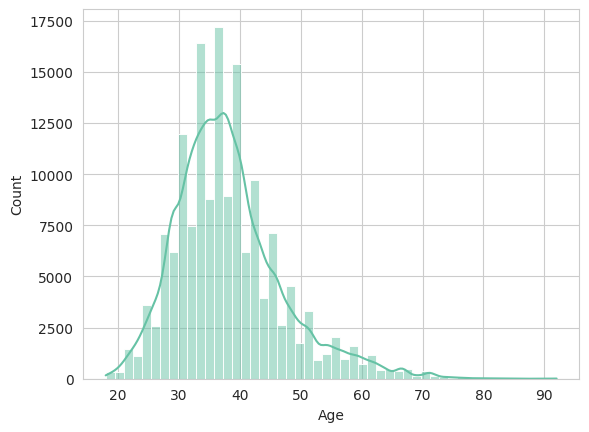

In [18]:
sns.histplot(df['Age'],bins= 50, kde=True)

## **Tenure Column**

In [19]:
df['Tenure'].unique()

array([ 3.,  1., 10.,  2.,  5.,  4.,  8.,  6.,  9.,  7., nan,  0.])

In [20]:
df['Tenure'].value_counts()

Tenure
2.0     17534
7.0     17298
4.0     17048
8.0     17038
5.0     16784
1.0     16260
9.0     16250
3.0     16124
6.0     15364
10.0     5756
0.0      4868
Name: count, dtype: int64

<Axes: xlabel='Tenure', ylabel='count'>

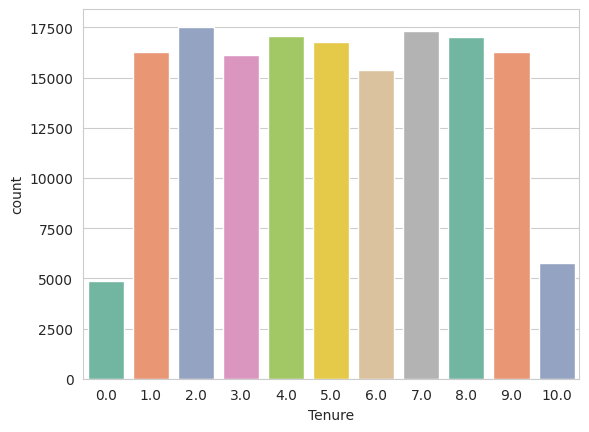

In [21]:
sns.countplot(x='Tenure',data=df,palette='Set2')

## **Balance Column**

Text(0.5, 1.0, 'Without 0 Balance')

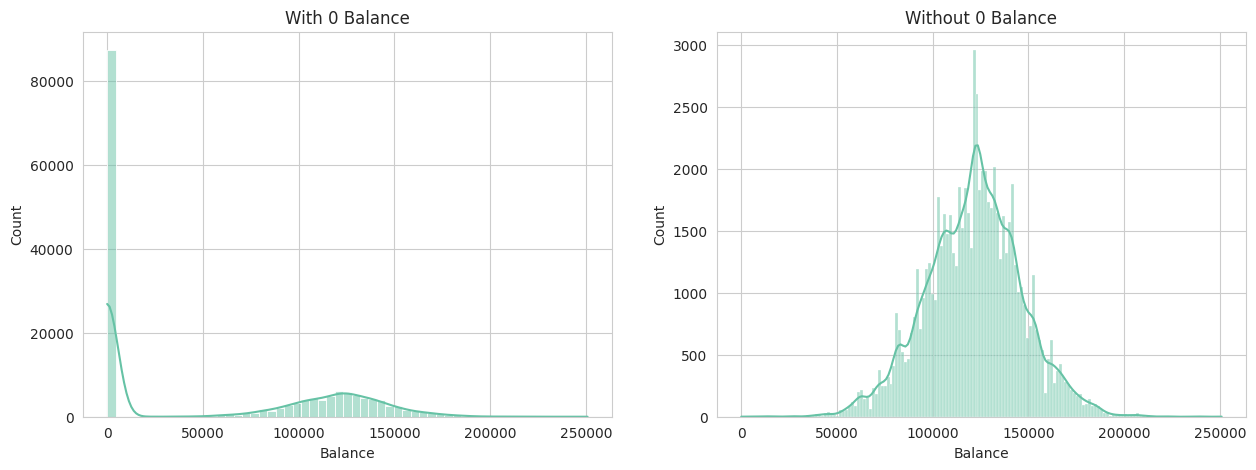

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['Balance'],kde=True)
plt.title('With 0 Balance')
plt.subplot(1,2,2)
sns.histplot(df.loc[df['Balance'] != 0,'Balance'],kde=True)
plt.title('Without 0 Balance')

## **Num of Products Column**

In [23]:
df['NumOfProducts'].unique()

array([ 2.,  1., nan,  3.,  4.])

<Axes: xlabel='NumOfProducts', ylabel='count'>

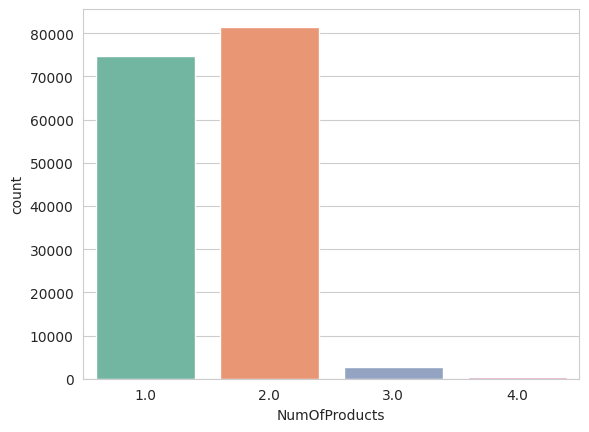

In [24]:
sns.countplot(x='NumOfProducts',data=df,palette='Set2')

## **Has Credit Card Column**

In [25]:
df['HasCrCard'].unique()

array([ 1.,  0., nan])

<Axes: xlabel='HasCrCard', ylabel='count'>

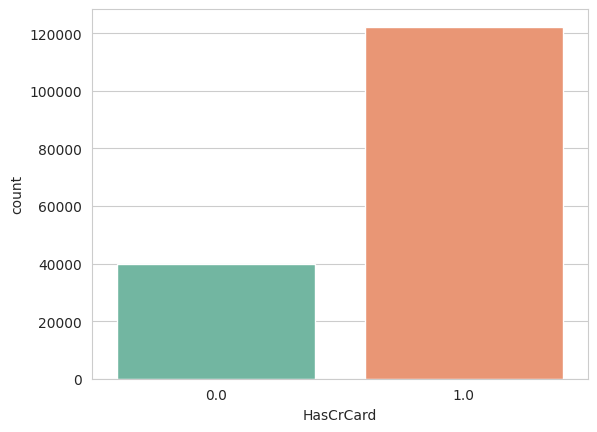

In [26]:
sns.countplot(x='HasCrCard',data=df,palette='Set2')

## **Is Active Member Column**

In [27]:
df['IsActiveMember'].unique()

array([ 0.,  1., nan])

<Axes: xlabel='HasCrCard', ylabel='count'>

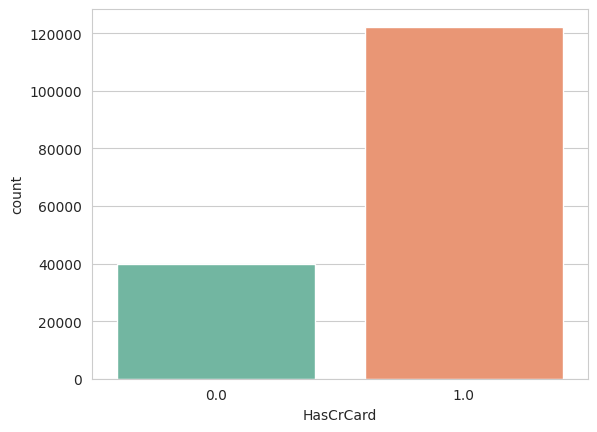

In [28]:
sns.countplot(x='HasCrCard',data=df,palette='Set2')

## **Estimated Salary Column**

In [29]:
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

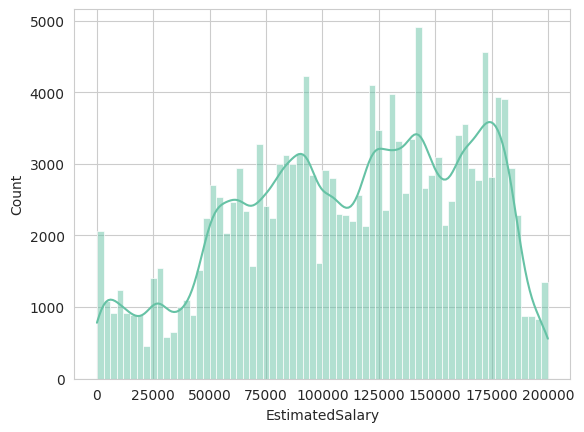

In [30]:
sns.histplot(df['EstimatedSalary'], kde=True)

## **Rating Column**

In [31]:
df['Rating'].unique()

array([-3,  0,  1, -4, -1, -2,  3, -5,  2,  4])

In [32]:
df['Rating'].value_counts()

Rating
-4    16779
 2    16683
 0    16577
-3    16528
-2    16449
 1    16435
 3    16419
 4    16404
-5    16380
-1    16377
Name: count, dtype: int64

In [33]:
df['Rating'] = df['Rating'].apply(lambda x: -x if x < 0 else x)

In [34]:
df['Rating'].value_counts()

Rating
4    33183
2    33132
3    32947
1    32812
0    16577
5    16380
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

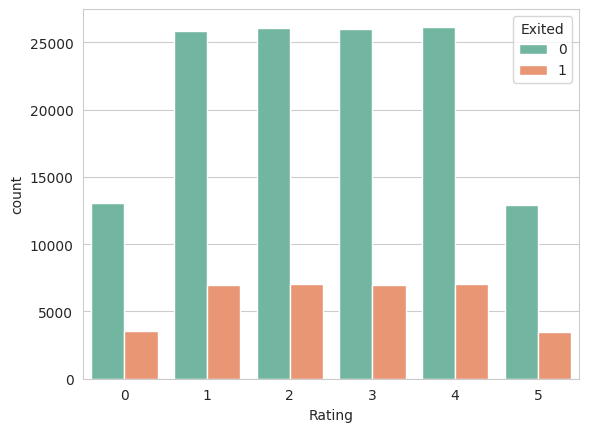

In [35]:
sns.countplot(x='Rating',data=df,palette='Set2',hue='Exited')

## **Exited Column**

In [36]:
df['Exited'].unique()

array([0, 1])

<Axes: xlabel='Exited', ylabel='count'>

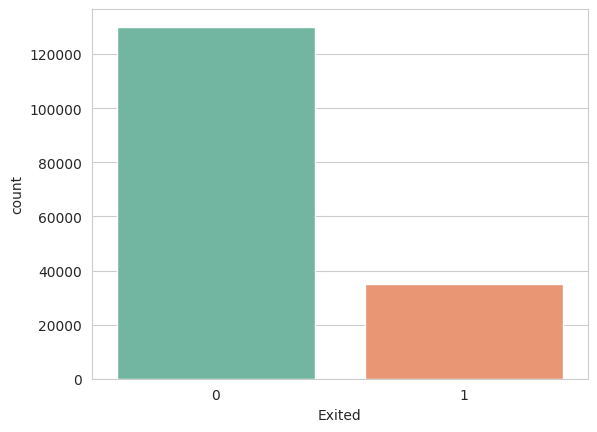

In [37]:
sns.countplot(x='Exited',data=df,palette='Set2')

## **Geography and Gender Column**

In [38]:
df['Geography:str,Gender:str'].unique()

array(["{'Geography': 'Paris-France','Gender': 'Male'}",
       "{'Geography': 'Madrid-Spain','Gender': 'Male'}",
       "{'Geography': 'Berlin-Gernay','Gender': 'Male'}",
       "{'Geography': 'Paris-France','Gender': 'Female'}",
       "{'Geography': 'Berlin-Gernay','Gender': 'Female'}",
       "{'Geography': 'Berlin-Gernay','Gender': 'nan'}",
       "{'Geography': 'Paris-France','Gender': 'nan'}",
       "{'Geography': 'Madrid-Spain','Gender': 'Female'}",
       "{'Geography': 'Madrid-Spain','Gender': 'nan'}",
       "{'Geography': 'nan','Gender': 'Female'}",
       "{'Geography': 'nan','Gender': 'Male'}",
       "{'Geography': 'nan','Gender': 'nan'}"], dtype=object)

In [39]:
df['Geography'] = (df['Geography:str,Gender:str'].str.split(',').str[0]).str.split(':').str[1].str[2:-1]
df['Gender']  = (df['Geography:str,Gender:str'].str.split(',').str[1]).str.split(':').str[1].str[2:-2]

In [40]:
df['Geography'] = df['Geography'].apply(lambda x: np.nan if x == 'nan' else x)
df['Gender'] = df['Gender'].apply(lambda x: np.nan if x == 'nan' else x)

In [41]:
df.drop('Geography:str,Gender:str',axis=1,inplace=True)

In [42]:
(df.isna().sum() / df.shape[0] *100).sort_values(ascending=False)

Gender             4.977853
Age                3.404209
NumOfProducts      3.345432
Tenure             2.852191
EstimatedSalary    2.773418
Balance            2.448631
IsActiveMember     2.135962
HasCrCard          1.722707
Geography          0.451430
CreditScore        0.224200
Rating             0.000000
Exited             0.000000
dtype: float64

In [43]:
df.dropna(subset=['Gender','Age','NumOfProducts'],inplace=True)

In [44]:
df.isna().sum().sort_values(ascending=False)

Tenure             4130
EstimatedSalary    4054
Balance            3596
IsActiveMember     3137
HasCrCard          2527
Geography           669
CreditScore         329
Age                   0
NumOfProducts         0
Rating                0
Exited                0
Gender                0
dtype: int64

<div style="
    background-color: #e76f6f;
    border-radius:  40px 20px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Exploratory Data Analysis (EDA)
    </span>
</div>


In [45]:
def pie_plot(df):
  num_columns = 4
  num_rows = 2

  fig,axes = plt.subplots(num_rows,num_columns,figsize=(20,15))
  axes = axes.flatten()
  for i,column in enumerate(df.columns):
    palette = sns.color_palette('Set2',df[column].nunique())

    counts = df[column].value_counts()
    axes[i].pie(counts.values,labels=counts.index,autopct='%.2f%%',colors=palette)
    axes[i].set_title(f'{column} Distribution')

  for j in range(len(df.columns), len(axes)):
      axes[j].axis('off')

  plt.tight_layout()
  plt.show()

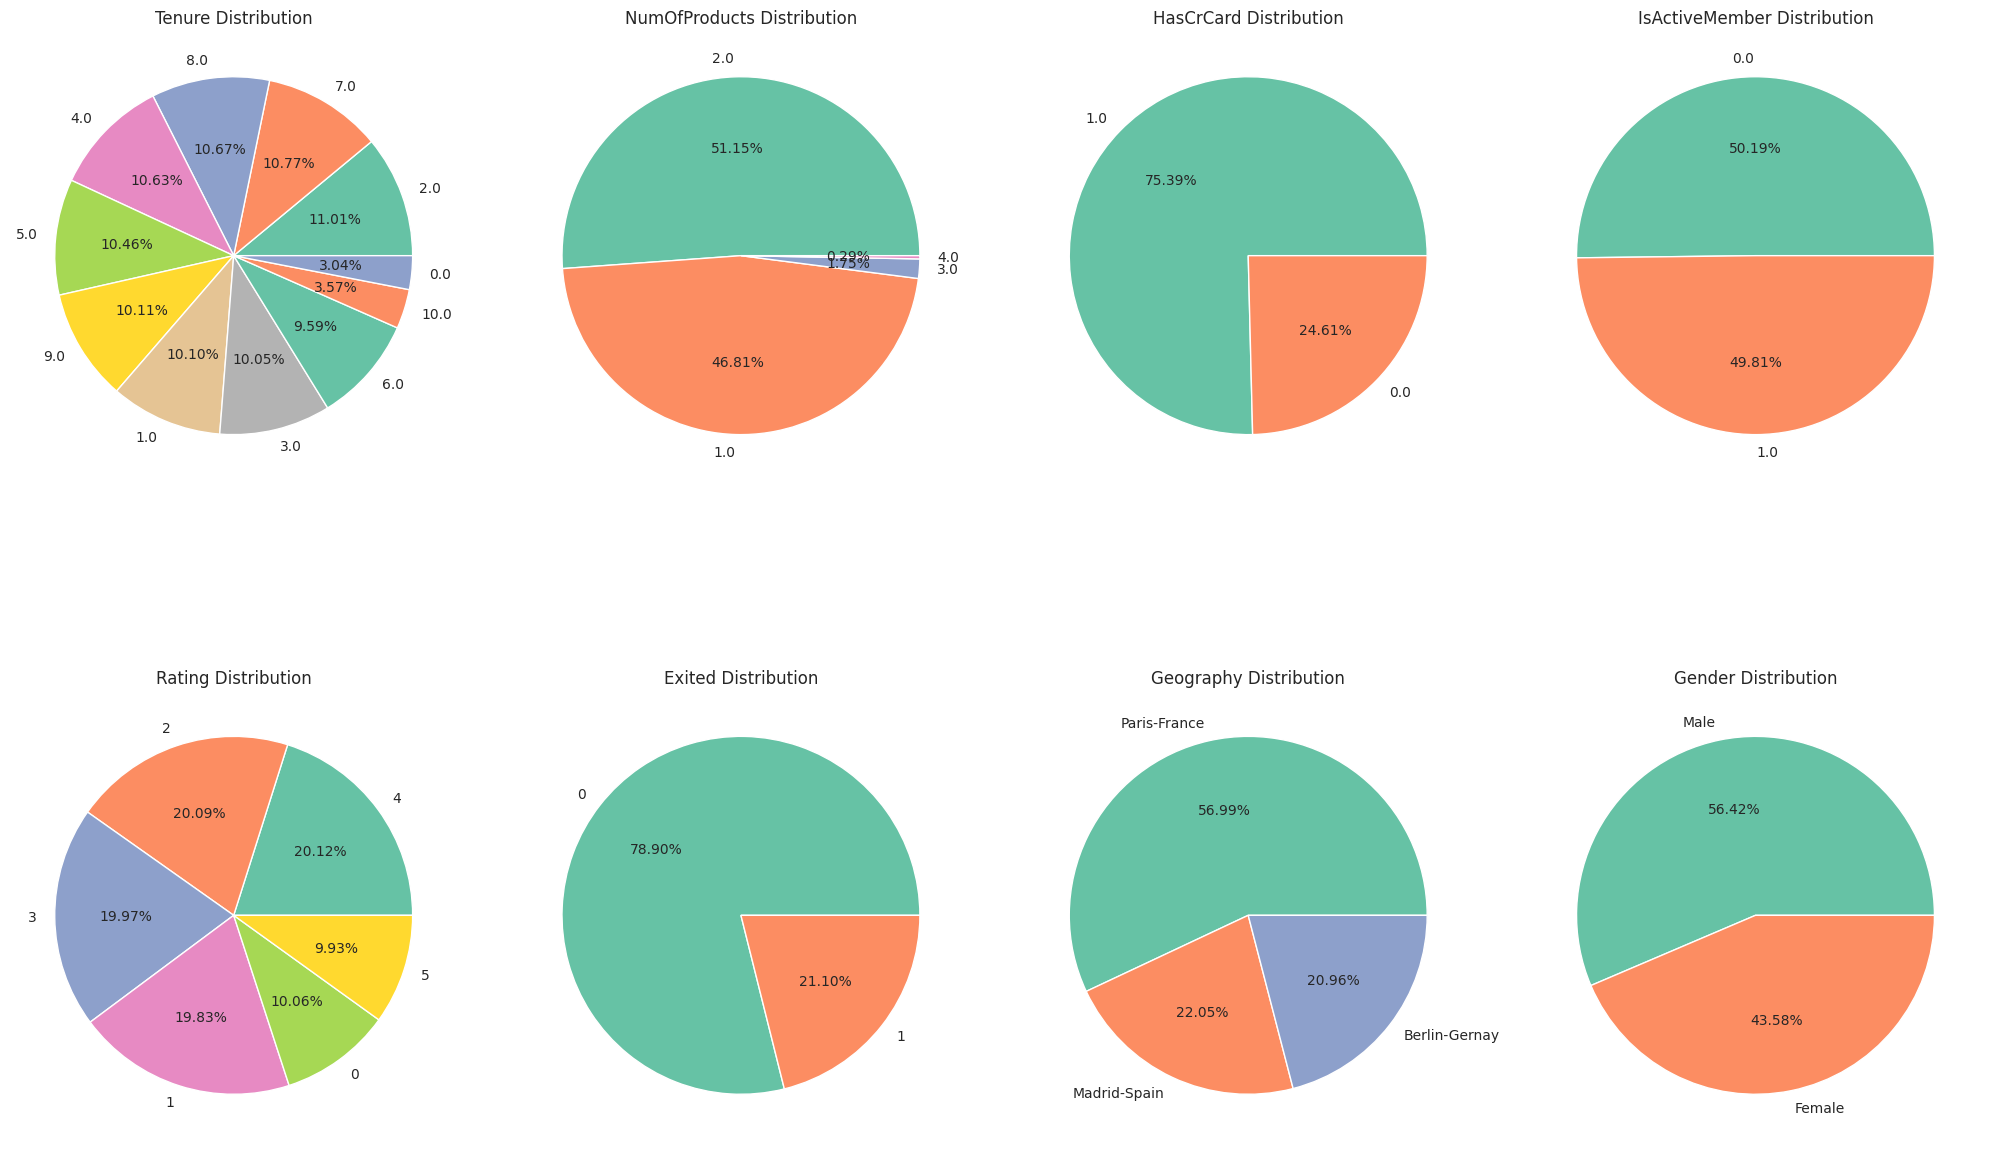

In [46]:
df_cat = df.drop(columns=['CreditScore','Age','Balance','EstimatedSalary'])
pie_plot(df_cat)

Text(0.5, 1.0, 'Has Credit Card vs Exited')

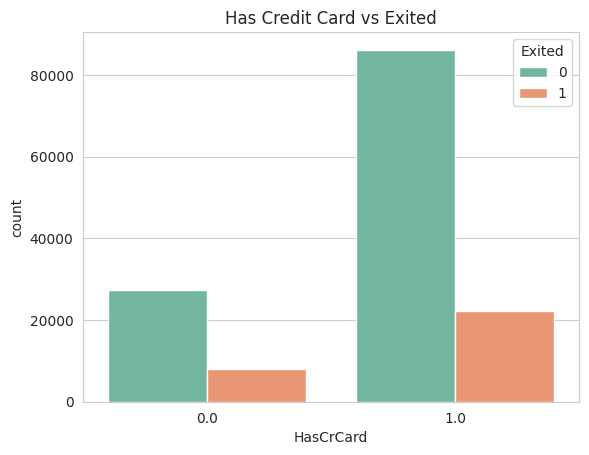

In [47]:
sns.countplot(x='HasCrCard',data=df,palette='Set2',hue='Exited',)
plt.title('Has Credit Card vs Exited')

Text(0.5, 1.0, 'Is Active Member vs Exited')

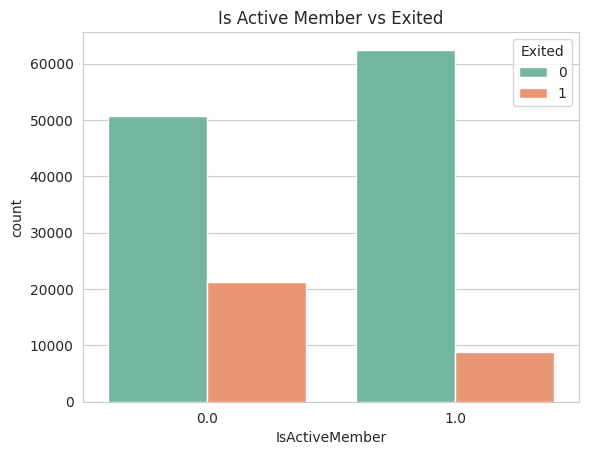

In [48]:
sns.countplot(x='IsActiveMember',data=df,palette='Set2',hue='Exited')
plt.title('Is Active Member vs Exited')

Text(0.5, 1.0, 'Geography vs Exited')

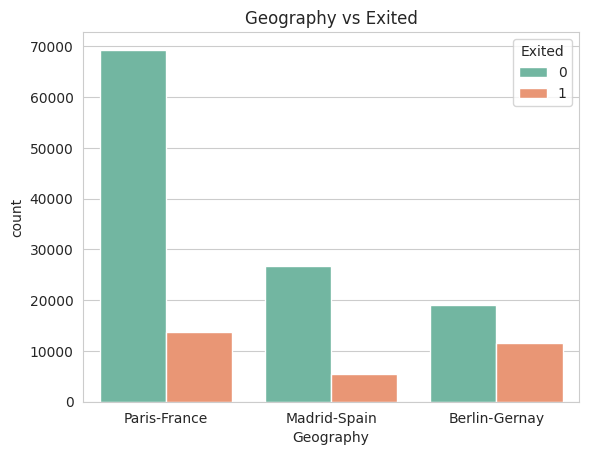

In [49]:
sns.countplot(x='Geography',data=df,palette='Set2',hue='Exited')
plt.title('Geography vs Exited')

Text(0.5, 1.0, 'Gender vs Exited')

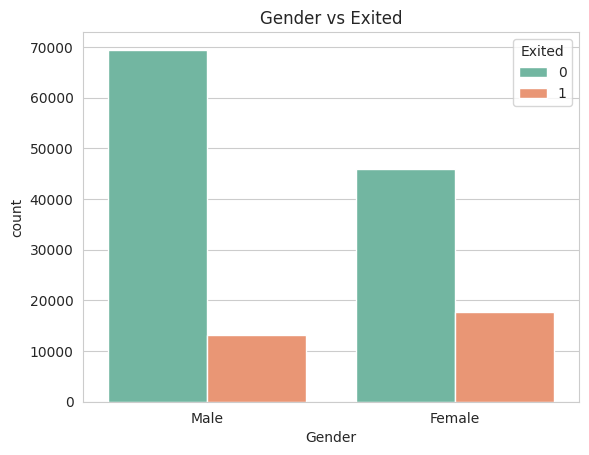

In [50]:
sns.countplot(x='Gender',data=df,palette='Set2',hue='Exited')
plt.title('Gender vs Exited')

Text(0.5, 1.0, 'Number of Products vs Exited')

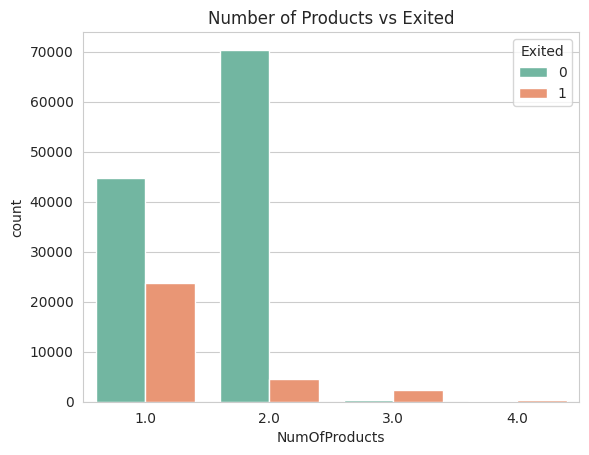

In [51]:
sns.countplot(x='NumOfProducts',data=df,palette='Set2',hue='Exited')
plt.title('Number of Products vs Exited')

Text(0.5, 1.0, 'Tenure vs Exited')

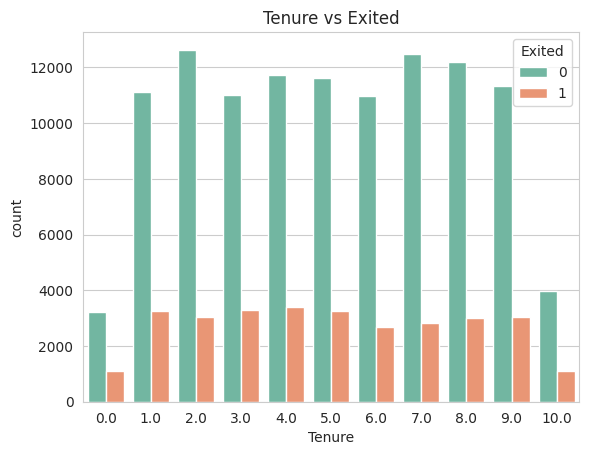

In [52]:
sns.countplot(x='Tenure',data=df,palette='Set2',hue='Exited')
plt.title('Tenure vs Exited')

Text(0.5, 1.0, 'Rating vs Exited')

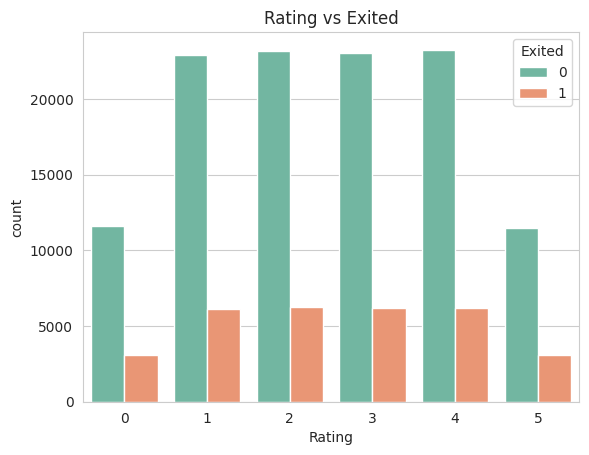

In [53]:
sns.countplot(x='Rating',data=df,palette='Set2',hue='Exited')
plt.title('Rating vs Exited')

## Correlation

<Axes: >

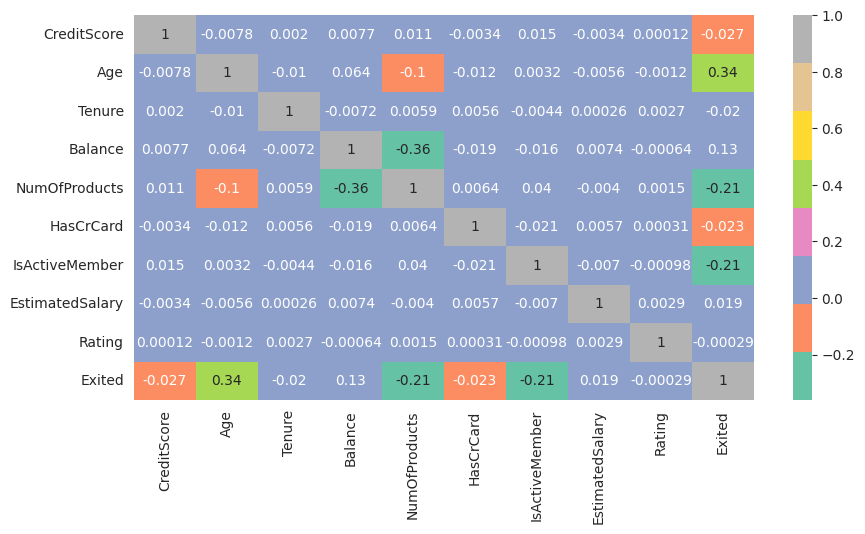

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Set2')

In [55]:
df['SalaryLevels'] = pd.cut(df['EstimatedSalary'], bins=[0, 50000, 80000,120000, 160000,np.inf], labels=['Small', 'Good', 'Very-Good', 'High', 'Very-High'])

<div style="
    background-color: #e76f6f;
    border-radius: 40px 20px;
    text-align: center;
    padding: 15px;
    margin: 20px 0;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        color: #fff;
    ">
        Key Findings
    </span>
</div>

<ul style="
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 16px;
    line-height: 1.6;
    background-color: #f9f9f9;
    border-radius: 10px;
    padding: 20px 30px;
    box-shadow: 0 4px 8px rgba(0,0,0,0.05);
    color: #333;
">
    <strong>Balance Distribution</strong>: Majority of customers (~80%) have 0 balance. For non-zero balances, most fall under €50,000–€200,000.
    <br>
    <strong>Active Membership (IsActiveMember)</strong>: Inactive members show higher churn rates compared to active ones.
    <br>
    <strong>Geography</strong>: Customers from Germany (Berlin) exhibit significantly higher churn than those from France (Paris) or Spain (Madrid).
    <br>
    <strong>Gender</strong>: Female customers churn more than male customers.
    <br>
    <strong>Tenure</strong>: Churn is relatively evenly distributed across tenure lengths, with no clear trend.
</ul>


<div style="
    background-color: #e76f6f;
    border-radius:  40px 20px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Model Pipeline
    </span>
</div>


In [56]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(f'X train shape -> {X_train.shape}')
print(f'X test shape -> {X_test.shape}')
print(f'y train shape -> {y_train.shape}')
print(f'y test shape -> {y_test.shape}')

X train shape -> (117128, 12)
X test shape -> (29283, 12)
y train shape -> (117128,)
y test shape -> (29283,)


In [57]:
numeric_features = ['CreditScore', 'Age', 'Balance']
Ordianl_Features = ['SalaryLevels', 'NumOfProducts', 'IsActiveMember', 'Tenure', 'HasCrCard']
Nominal_Features = ['Gender', 'Geography']

In [58]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler())
])

ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

nom_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first',  sparse_output=False))
])

In [59]:
preprocessing = ColumnTransformer([
    ('numeric', num_pipeline, numeric_features),
    ('ordinal', ord_pipeline, Ordianl_Features),
    ('nominal', nom_pipeline, Nominal_Features)
]).set_output(transform='pandas')

In [60]:
X_train_prep = preprocessing.fit_transform(X_train)
X_test_prep = preprocessing.transform(X_test)

<div style="
    background-color: #e76f6f;
    border-radius:  40px 20px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Model Training
    </span>
</div>


In [61]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [62]:
for model_name,model in models.items():
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_prep, y_train, cv=cv, scoring='accuracy')
    print(model_name)
    print('-'*len(model_name))
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
    print(f"std CV Accuracy: {np.std(cv_scores):.4f}\n\n")

Logistic Regression
-------------------
Cross-validation scores: [0.84290959 0.84039102 0.83616494 0.84128068 0.84008538]
Mean CV Accuracy: 0.8402
std CV Accuracy: 0.0022


XGBoost
-------
Cross-validation scores: [0.86485102 0.86579015 0.85652694 0.86151547 0.86288154]
Mean CV Accuracy: 0.8623
std CV Accuracy: 0.0033


K-Nearest Neighbors
-------------------
Cross-validation scores: [0.83911039 0.83646376 0.83351831 0.83530416 0.83295624]
Mean CV Accuracy: 0.8355
std CV Accuracy: 0.0022


Random Forest
-------------
Cross-validation scores: [0.85844788 0.85763681 0.85170324 0.85353255 0.85622199]
Mean CV Accuracy: 0.8555
std CV Accuracy: 0.0025




## **Fine Tune XGBoost**

In [63]:
XGR = Pipeline([
    ('preprocessing', preprocessing),
    ('XGR', XGBClassifier(random_state=42))
])

XGR_param_grid = {
    'preprocessing__numeric__poly__degree': [2, 3],
    'XGR__n_estimators': [600, 800],
    'XGR__max_depth': [5, 7],
    'XGR__learning_rate': [0.01, 0.1],
    'XGR__gamma': [2, 4, 6],
    'XGR__subsample': [0.2, 0.4],
}

XGR_grid_search = GridSearchCV(XGR, XGR_param_grid, cv=3,scoring='accuracy',verbose=True,n_jobs=-1)
XGR_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Balance']),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          Or...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGR__gamma': [2, 4, 6],
                         'XGR__learning_rate': [0.01, 0.1],
                         'XGR__max_depth': [5, 7],
                         'XGR__n_estimators': [600, 800],
                         'XGR__subsample': [0.2, 0.4],
                         'preprocessing__numeric__poly__degree': [2, 3]},
             scoring='accuracy', verbose=True)

In [64]:
XGR_grid_search.best_params_

{'XGR__gamma': 6,
 'XGR__learning_rate': 0.1,
 'XGR__max_depth': 5,
 'XGR__n_estimators': 600,
 'XGR__subsample': 0.4,
 'preprocessing__numeric__poly__degree': 2}

In [65]:
XGR_grid_search.best_score_

0.8647377260935786

In [66]:
best_model = XGR_grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     23104
           1       0.75      0.56      0.64      6179

    accuracy                           0.87     29283
   macro avg       0.82      0.75      0.78     29283
weighted avg       0.86      0.87      0.86     29283



<div style="
    background-color: #e76f6f;
    border-radius: 10px;
    border-left: 10px solid #F2F2F2;
    text-align: left;
    padding: 15px 20px;
    margin: 10px 0;
    font-family: 'Comic Sans MS', 'Comic Neue', cursive;
    color: #fff;
">
    <div style="
        font-size: 28px;
        font-weight: bold;
        margin-bottom: 8px;
    ">
        Enhance Recall
    </div>
    <p style="margin: 0; font-size: 16px;">
        Reduce missed churners (<strong>false negatives</strong>) even at the cost of higher false positives.
    </p>
</div>


In [67]:
y_pred_proba_xg = best_model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_xg[:, 1])

Text(0.5, 1.0, 'Precision-Recall vs Threshold')

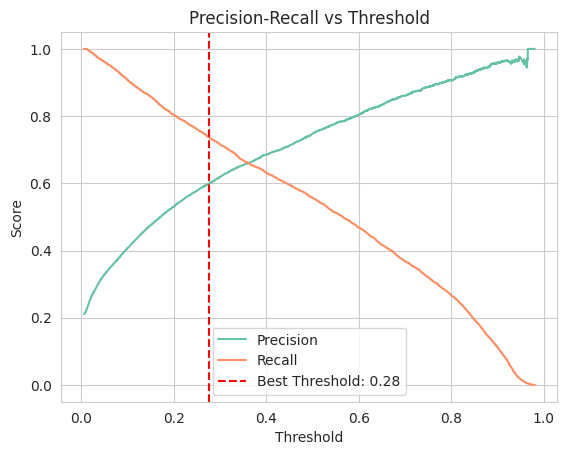

In [68]:
min_precision = 0.6

valid_indices = np.where(precision > min_precision)[0]
best_recall_index = valid_indices[np.argmax(recall[valid_indices])]
xg_best_threshold = thresholds[best_recall_index]


plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.axvline(x=xg_best_threshold, color='r', linestyle='--', label=f'Best Threshold: {xg_best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")

In [69]:
y_pred_xg = (y_pred_proba_xg[:, 1] > xg_best_threshold).astype(int)

print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     23104
           1       0.60      0.74      0.66      6179

    accuracy                           0.84     29283
   macro avg       0.76      0.80      0.78     29283
weighted avg       0.86      0.84      0.85     29283



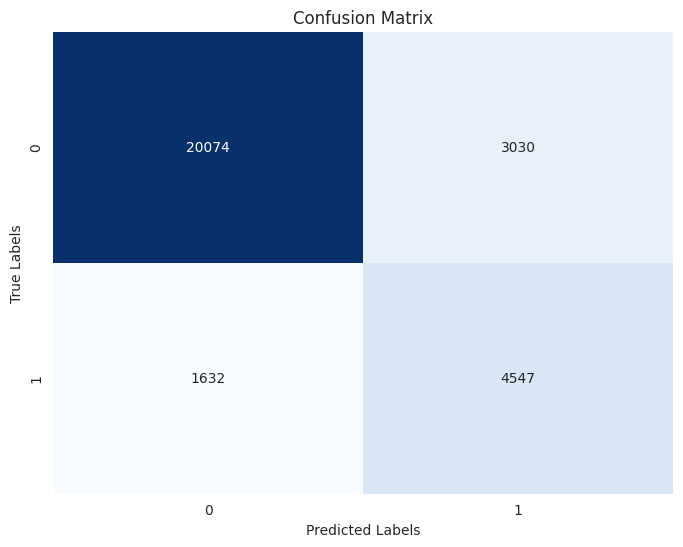

In [70]:
cm = confusion_matrix(y_test, y_pred_xg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## **Fine Tune Random Forest**

In [71]:
RF = Pipeline([
    ('preprocessing', preprocessing),
    ('RF', RandomForestClassifier(random_state=42))
])

RF_param_grid = {
    'preprocessing__numeric__poly__degree': [2, 3],
    'RF__n_estimators': [300, 500],
    'RF__max_depth': [20, 30],
    'RF__min_samples_split': [2, 5],
    'RF__min_samples_leaf': [2, 4],
}
RF_search = GridSearchCV(RF, RF_param_grid, cv=3,scoring='accuracy',verbose=True,n_jobs=-1)
RF_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Balance']),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          Or...
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Gender',
                                                                          'Geography'])])),
                                       ('RF',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RF__max_depth': [20, 30],
                         'RF__min_samples_leaf': [2, 4],
                         'RF__min_samples_split': [2, 5],
                         'RF__n_estimators': [300, 500],
                         'preprocessing__numeric__poly__degree': [2, 3]},
             scoring='accuracy', verbose=True)

In [72]:
RF_search.best_params_

{'RF__max_depth': 30,
 'RF__min_samples_leaf': 4,
 'RF__min_samples_split': 2,
 'RF__n_estimators': 500,
 'preprocessing__numeric__poly__degree': 2}

In [73]:
RF_search.best_score_

0.860921389504556

In [74]:
RF_best_model = RF_search.best_estimator_
y_pred = RF_best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     23104
           1       0.75      0.53      0.62      6179

    accuracy                           0.86     29283
   macro avg       0.81      0.74      0.77     29283
weighted avg       0.85      0.86      0.85     29283



In [75]:
y_pred_proba_RF = RF_best_model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_RF[:, 1])

Text(0.5, 1.0, 'Precision-Recall vs Threshold')

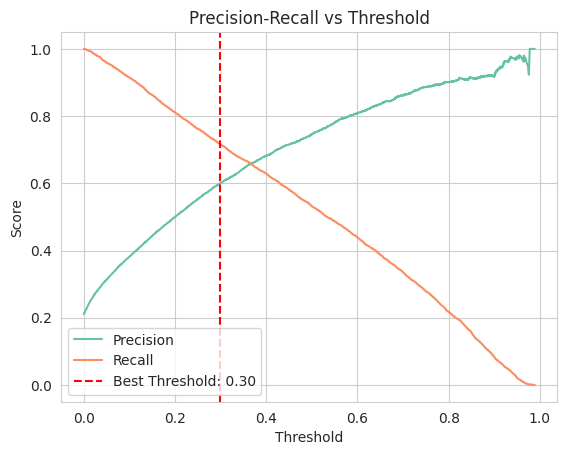

In [76]:
min_precision = 0.6

indices = np.where(precision > min_precision)[0]
best_recall_index = indices[np.argmax(recall[indices])]
RF_best_threshold = thresholds[best_recall_index]

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.axvline(x=RF_best_threshold, color='r', linestyle='--', label=f'Best Threshold: {RF_best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")

In [77]:
y_pred_RF = (y_pred_proba_RF[:, 1] > RF_best_threshold).astype(int)

print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     23104
           1       0.60      0.72      0.65      6179

    accuracy                           0.84     29283
   macro avg       0.76      0.79      0.77     29283
weighted avg       0.85      0.84      0.84     29283



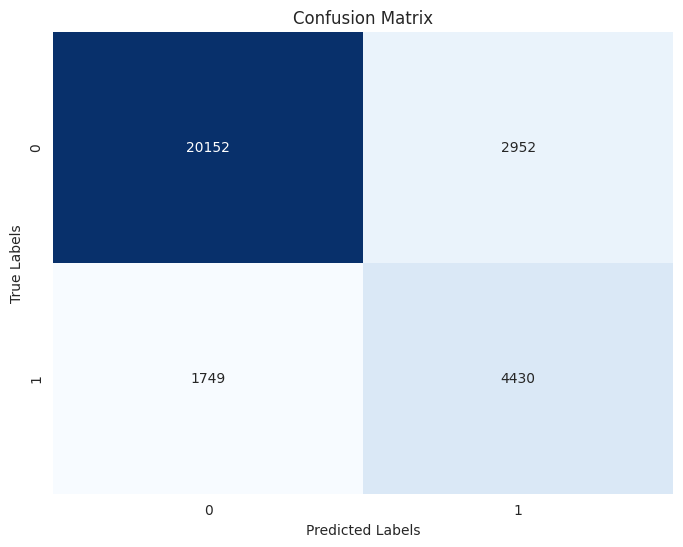

In [78]:
cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## **ROC Curve**

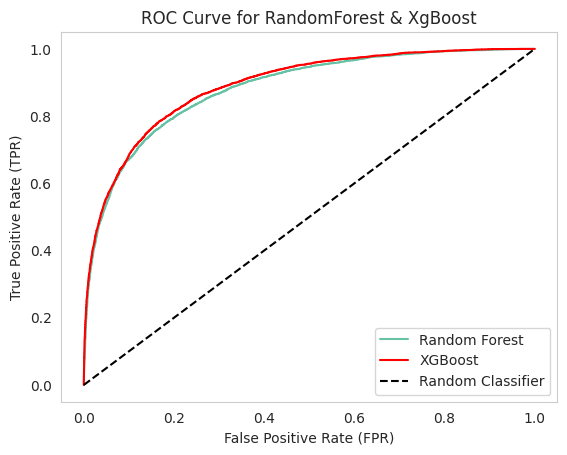

In [79]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_RF[:, 1])

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xg[:, 1])

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost',color = 'r')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for RandomForest & XgBoost')
plt.legend()
plt.grid()
plt.show()